In [95]:
import pandas as pd
import numpy as np

In [96]:
df = pd.read_csv(r"C:\Users\hieudd\Downloads\Online Retail.xlsx - Online Retail.csv")
df['CustomerID'].fillna(value='FIt', inplace=True)
df['UnitPrice'] = df['UnitPrice'].str.replace(',','.').astype('float')
df['InvoiceDate'] = df['InvoiceDate'].str.split(' ',expand=True)[0]
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%y')
df['first_InvoiceDate'] = df.groupby('CustomerID')['InvoiceDate'].transform('min')
df['first_InvoiceM'] = df['first_InvoiceDate'].dt.to_period('M')
df['Month_diff'] = ((df.InvoiceDate - df.first_InvoiceDate)/np.timedelta64(1, 'M')).astype('int')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,first_InvoiceDate,first_InvoiceM,Month_diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,2010-12-01,2010-12,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,2010-12-01,2010-12,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,2010-12-01,2010-12,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,2010-12-01,2010-12,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,2010-12-01,2010-12,0
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680.0,France,2011-08-18,2011-08,3
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France,2011-08-18,2011-08,3
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France,2011-08-18,2011-08,3
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France,2011-08-18,2011-08,3


In [97]:
cohort_group = df.groupby(['first_InvoiceM','Month_diff']).agg(Month_diff = ('CustomerID','nunique')).unstack().reset_index()
cohort_group.fillna(value=0, inplace= True)
cohort_group

first_InvoiceM Month_diff                                     \
Month_diff                         0      1      2      3      4      5   
0                 2010-12      949.0  350.0  350.0  379.0  321.0  365.0   
1                 2011-01      421.0  109.0  122.0  125.0  127.0  122.0   
2                 2011-02      380.0   85.0   98.0  109.0   79.0  105.0   
3                 2011-03      440.0   82.0  110.0  102.0   86.0   95.0   
4                 2011-04      299.0   81.0   56.0   64.0   55.0   70.0   
5                 2011-05      279.0   55.0   44.0   57.0   73.0   64.0   
6                 2011-06      235.0   38.0   51.0   58.0   68.0   66.0   
7                 2011-07      191.0   35.0   41.0   44.0   46.0    1.0   
8                 2011-08      167.0   38.0   49.0   39.0    1.0    0.0   
9                 2011-09      298.0   89.0   75.0    4.0    0.0    0.0   
10                2011-10      352.0   77.0    5.0    0.0    0.0    0.0   
11                2011-11      321.0   12.0    0.0    0.0    0.0    0.0   
12                2011-12       41.0    0.0    0.0    0.0    0.0    0.0   

                                                            
Month_diff      6      7      8      9     10     11    12  
0           354.0  326.0  339.0  365.0  398.0  480.0  86.0  
1           109.0  114.0  142.0  152.0  115.0    4.0   0.0  
2            98.0  103.0  108.0   91.0    2.0    0.0   0.0  
3           108.0  117.0   94.0   17.0    0.0    0.0   0.0  
4            74.0   68.0    7.0    0.0    0.0    0.0   0.0  
5            72.0    3.0    0.0    0.0    0.0    0.0   0.0  
6             5.0    0.0    0.0    0.0    0.0    0.0   0.0  
7             0.0    0.0    0.0    0.0    0.0    0.0   0.0  
8             0.0    0.0    0.0    0.0    0.0    0.0   0.0  
9             0.0    0.0    0.0    0.0    0.0    0.0   0.0  
10            0.0    0.0    0.0    0.0    0.0    0.0   0.0  
11            0.0    0.0    0.0    0.0    0.0    0.0   0.0  
12            0.0    0.0    0.0    0.0    0.0    0.0   0.0

In [98]:
for i in cohort_group.columns.to_list():
    if i not in [cohort_group.columns.to_list()[0],cohort_group.columns.to_list()[1]] :
        cohort_group[i] = cohort_group[i]/cohort_group[cohort_group.columns.to_list()[1]]
cohort_group

first_InvoiceM Month_diff                                          \
Month_diff                         0         1         2         3         4   
0                 2010-12      949.0  0.368809  0.368809  0.399368  0.338251   
1                 2011-01      421.0  0.258907  0.289786  0.296912  0.301663   
2                 2011-02      380.0  0.223684  0.257895  0.286842  0.207895   
3                 2011-03      440.0  0.186364  0.250000  0.231818  0.195455   
4                 2011-04      299.0  0.270903  0.187291  0.214047  0.183946   
5                 2011-05      279.0  0.197133  0.157706  0.204301  0.261649   
6                 2011-06      235.0  0.161702  0.217021  0.246809  0.289362   
7                 2011-07      191.0  0.183246  0.214660  0.230366  0.240838   
8                 2011-08      167.0  0.227545  0.293413  0.233533  0.005988   
9                 2011-09      298.0  0.298658  0.251678  0.013423  0.000000   
10                2011-10      352.0  0.218750  0.014205  0.000000  0.000000   
11                2011-11      321.0  0.037383  0.000000  0.000000  0.000000   
12                2011-12       41.0  0.000000  0.000000  0.000000  0.000000   

                                                                        \
Month_diff         5         6         7         8         9        10   
0           0.384615  0.373024  0.343519  0.357218  0.384615  0.419389   
1           0.289786  0.258907  0.270784  0.337292  0.361045  0.273159   
2           0.276316  0.257895  0.271053  0.284211  0.239474  0.005263   
3           0.215909  0.245455  0.265909  0.213636  0.038636  0.000000   
4           0.234114  0.247492  0.227425  0.023411  0.000000  0.000000   
5           0.229391  0.258065  0.010753  0.000000  0.000000  0.000000   
6           0.280851  0.021277  0.000000  0.000000  0.000000  0.000000   
7           0.005236  0.000000  0.000000  0.000000  0.000000  0.000000   
8           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
9           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
10          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
11          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
12          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

                                
Month_diff        11        12  
0           0.505796  0.090622  
1           0.009501  0.000000  
2           0.000000  0.000000  
3           0.000000  0.000000  
4           0.000000  0.000000  
5           0.000000  0.000000  
6           0.000000  0.000000  
7           0.000000  0.000000  
8           0.000000  0.000000  
9           0.000000  0.000000  
10          0.000000  0.000000  
11          0.000000  0.000000  
12          0.000000  0.000000

In [99]:
cohort_group[cohort_group.columns.to_list()[1]] = cohort_group[cohort_group.columns.to_list()[1]]/cohort_group[cohort_group.columns.to_list()[1]]
cohort_group

first_InvoiceM Month_diff                                          \
Month_diff                         0         1         2         3         4   
0                 2010-12        1.0  0.368809  0.368809  0.399368  0.338251   
1                 2011-01        1.0  0.258907  0.289786  0.296912  0.301663   
2                 2011-02        1.0  0.223684  0.257895  0.286842  0.207895   
3                 2011-03        1.0  0.186364  0.250000  0.231818  0.195455   
4                 2011-04        1.0  0.270903  0.187291  0.214047  0.183946   
5                 2011-05        1.0  0.197133  0.157706  0.204301  0.261649   
6                 2011-06        1.0  0.161702  0.217021  0.246809  0.289362   
7                 2011-07        1.0  0.183246  0.214660  0.230366  0.240838   
8                 2011-08        1.0  0.227545  0.293413  0.233533  0.005988   
9                 2011-09        1.0  0.298658  0.251678  0.013423  0.000000   
10                2011-10        1.0  0.218750  0.014205  0.000000  0.000000   
11                2011-11        1.0  0.037383  0.000000  0.000000  0.000000   
12                2011-12        1.0  0.000000  0.000000  0.000000  0.000000   

                                                                        \
Month_diff         5         6         7         8         9        10   
0           0.384615  0.373024  0.343519  0.357218  0.384615  0.419389   
1           0.289786  0.258907  0.270784  0.337292  0.361045  0.273159   
2           0.276316  0.257895  0.271053  0.284211  0.239474  0.005263   
3           0.215909  0.245455  0.265909  0.213636  0.038636  0.000000   
4           0.234114  0.247492  0.227425  0.023411  0.000000  0.000000   
5           0.229391  0.258065  0.010753  0.000000  0.000000  0.000000   
6           0.280851  0.021277  0.000000  0.000000  0.000000  0.000000   
7           0.005236  0.000000  0.000000  0.000000  0.000000  0.000000   
8           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
9           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
10          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
11          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
12          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

                                
Month_diff        11        12  
0           0.505796  0.090622  
1           0.009501  0.000000  
2           0.000000  0.000000  
3           0.000000  0.000000  
4           0.000000  0.000000  
5           0.000000  0.000000  
6           0.000000  0.000000  
7           0.000000  0.000000  
8           0.000000  0.000000  
9           0.000000  0.000000  
10          0.000000  0.000000  
11          0.000000  0.000000  
12          0.000000  0.000000

In [100]:
cohort_group.set_index('first_InvoiceM',inplace=True)
cohort_group

Month_diff                                                    \
Month_diff              0         1         2         3         4         5   
first_InvoiceM                                                                
2010-12               1.0  0.368809  0.368809  0.399368  0.338251  0.384615   
2011-01               1.0  0.258907  0.289786  0.296912  0.301663  0.289786   
2011-02               1.0  0.223684  0.257895  0.286842  0.207895  0.276316   
2011-03               1.0  0.186364  0.250000  0.231818  0.195455  0.215909   
2011-04               1.0  0.270903  0.187291  0.214047  0.183946  0.234114   
2011-05               1.0  0.197133  0.157706  0.204301  0.261649  0.229391   
2011-06               1.0  0.161702  0.217021  0.246809  0.289362  0.280851   
2011-07               1.0  0.183246  0.214660  0.230366  0.240838  0.005236   
2011-08               1.0  0.227545  0.293413  0.233533  0.005988  0.000000   
2011-09               1.0  0.298658  0.251678  0.013423  0.000000  0.000000   
2011-10               1.0  0.218750  0.014205  0.000000  0.000000  0.000000   
2011-11               1.0  0.037383  0.000000  0.000000  0.000000  0.000000   
2011-12               1.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                                                                            \
Month_diff             6         7         8         9        10        11   
first_InvoiceM                                                               
2010-12         0.373024  0.343519  0.357218  0.384615  0.419389  0.505796   
2011-01         0.258907  0.270784  0.337292  0.361045  0.273159  0.009501   
2011-02         0.257895  0.271053  0.284211  0.239474  0.005263  0.000000   
2011-03         0.245455  0.265909  0.213636  0.038636  0.000000  0.000000   
2011-04         0.247492  0.227425  0.023411  0.000000  0.000000  0.000000   
2011-05         0.258065  0.010753  0.000000  0.000000  0.000000  0.000000   
2011-06         0.021277  0.000000  0.000000  0.000000  0.000000  0.000000   
2011-07         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2011-08         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2011-09         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2011-10         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2011-11         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2011-12         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

                          
Month_diff            12  
first_InvoiceM            
2010-12         0.090622  
2011-01         0.000000  
2011-02         0.000000  
2011-03         0.000000  
2011-04         0.000000  
2011-05         0.000000  
2011-06         0.000000  
2011-07         0.000000  
2011-08         0.000000  
2011-09         0.000000  
2011-10         0.000000  
2011-11         0.000000  
2011-12         0.000000

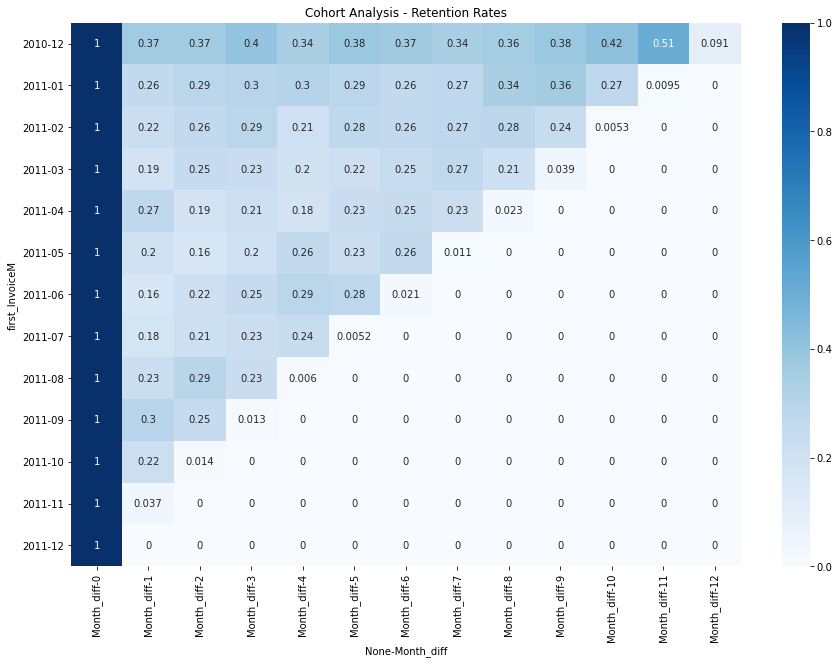

In [101]:
# Visualize the retention rates using seaborn or matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plt.title('Cohort Analysis - Retention Rates')
sns.heatmap(data=cohort_group, cmap='Blues', annot=True)
plt.show()